In [16]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Putzu potentziala



Hirugarren praktika honetan putzu potentziala deritzogun potentziala aztertu dugu, edo partikula altuera finituko kaxa batean. Sistema honetan partikula ondoko potentzialaren menpe dago: $V(x)=-D$ baldin eta $-L<x<L$.

Unitate atomikoak eta problemaren ezaugarriak zehaztu:

In [17]:
# unitate atomikoak
hbar = 1.0
m = 1.0
# zehaztu zenbat puntu ezberdin egongo dira
steps = 2000

Ondoren  putzuaren luzera (L) eta altuera (D) zehaztu:

In [18]:
D = 100.0
W = 1.0
L = W / 2.0

In [19]:
# x bektorea sortu [-L,L] tartean
xvec = np.linspace(-W, W, steps)
# lortu pauso bakoitzaren luzera
h = xvec[1] - xvec[0]

Putzu potentziala Hamiltondarrean sartu beharra dago, x balio posible guztietarako definitu behar dugularik:
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2 + V(x),\hspace{0.5cm}V(x)=\begin{Bmatrix} -D & if\hspace{0.5cm}-L<x<L \\ 0 & beste\hspace{0.1cm}kasuetan \end{Bmatrix}
\end{equation}
Hasteko, potentziala kalkulatzen dugu matrize formatuan:

In [20]:
def well_potential(L, x, D):
    pot = -D*(np.sign(x+L) - np.sign(x-L))
    return pot

U = well_potential(L, xvec, D)

Ondoren, Laplaziarra matrize baten moduan idatzi 'diferentzia finituak' delako metodoaz baliatuz:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [21]:

Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

In [22]:
# create the Hamiltonian
Hamiltonian = np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j] = U
Hamiltonian += (-0.5)*((hbar**2)/m)*Laplacian

Bektore (*eigenvectors*) eta balore (*eigenvalues*) propiak lortzeko Scipy-ren `eigh` funtzioa erabili:

In [23]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [24]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Dagoeneko metodo guztiak ditugu, beraz numerikoki lortutako emaitzak aztertuko ditugu:

In [25]:
# zenbat energia maila aztertuko ditugu
n = 8

In [26]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = -195.08
E(2) = -180.30
E(3) = -155.68
E(4) = -121.20
E(5) = -76.88
E(6) = -22.70
E(7) = 41.32
E(8) = 115.19


Text(0,0.5,'Energy / (a.u.)')

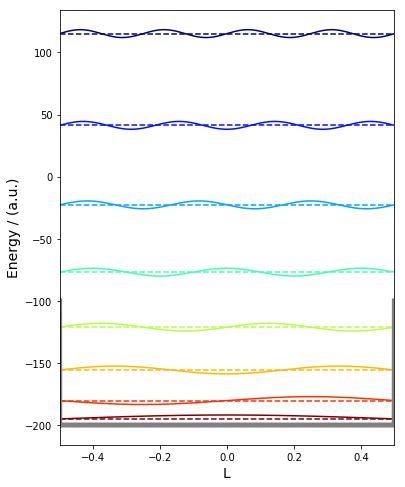

In [27]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, 100*v + E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.plot(xvec, U, c='gray', lw=5)
ax.set_xlim(xvec[0], xvec[-1])
#x.set_ylim(-E[0], E[n])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)

1. Nola aldatzen dira energia mailak putzuaren altuerarekin ?
2. Nola aldatzen dira uhin funtzioak putzuaren altuerarekin ?
3. Zein da diferentzia nabarmenena atzoko adibidearekin (partikula kaxa batean) ?